In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

In [11]:
cancer_ = load_breast_cancer()

In [12]:
cancer_.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [28]:
cancer_['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [26]:
cancer=pd.DataFrame(cancer_['data'],columns=cancer_['feature_names'])

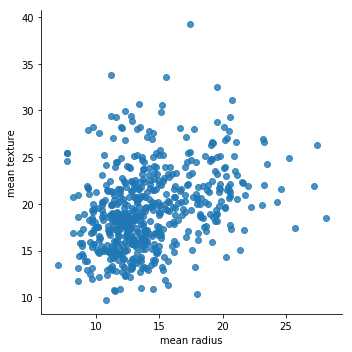

In [62]:
y=pd.Series(cancer_['target'])
sns.lmplot('mean radius','mean texture',cancer,fit_reg=False)

In [41]:
type(cancer['mean radius'])

pandas.core.series.Series

In [42]:
y=np.array(cancer_['target'])



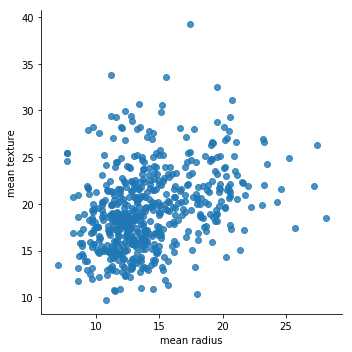

In [67]:
sns.lmplot('mean radius','mean texture',cancer,fit_reg=False)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
scaled_cancer=scaler.fit_transform(cancer)

In [53]:
from sklearn.decomposition import PCA

In [54]:
model = PCA(n_components=2)

In [56]:
x_pca=model.fit_transform(scaled_cancer)

In [71]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0,0.5,'2nd PC')

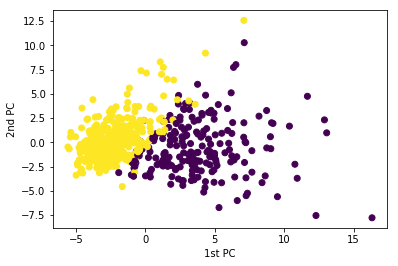

In [73]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer_['target'])
plt.xlabel('1st PC')
plt.ylabel('2nd PC')

In [70]:
model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [74]:
heat=pd.DataFrame(model.components_,columns=cancer.columns)

In [75]:
heat

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


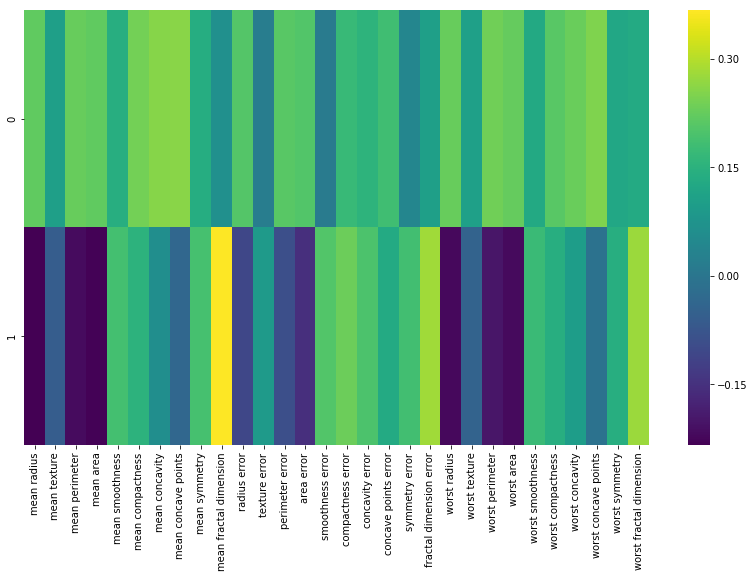

In [83]:
plt.figure(figsize=(14,8))
sns.heatmap(heat,cmap='viridis')